# ADS2 - Assignment 2 - Data Handling and Processing with PySpark

In this assignment, you will be analysing the popularity of films and TV shows on the streaming platform, Netflix. Using your knowledge of PySpark DataFrames and Spark SQL, you will produce a number of "downstream" data products to analyse trends in global streaming habits.

Download the dataset from this [Kaggle](https://www.kaggle.com/dhruvildave/netflix-top-10-tv-shows-and-films) page. A copy of the `all_weeks_countries.csv` file is also available on the canvas page for this assignment.

Your task is to load in the data and produce a number of "downstream" data products and plots as described below.

The PySpark installation and setup is provided below for conveinience.

In [ ]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Mount Google Drive and unpack Spark
from google.colab import drive
drive.mount('/content/drive')
!tar xzf /content/drive/MyDrive/spark-3.3.0-bin-hadoop3.tgz

In [ ]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# Exercise 1 - Data Preparation (5 Marks)


1.   Load the `all_weeks_countries.csv` into your Colab Notebook as a DataFrame.
2.   Create two separate DataFrames for Films and TV.
3.   For the Films data, drop the column containing the season names.
4.   For the TV data, replace any null values in the season name column with the show name.

In [12]:
# pyspark.sql.functions countains all the transformations and actions you will
# need
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

In [2]:
### Load the all_weeks_countries.csv into your Colab Notebook as a DataFrame.
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()
# Read CSV file
df = spark.read.csv("all-weeks-countries.csv", header=True, inferSchema=True)
# Show the first 20 rows
df.show()

+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|        season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21|   Films|          1|      Look Both Ways|                null|                         1|
|   Argentina|          AR|2022-08-21|   Films|          2|           Day Shift|                null|                         2|
|   Argentina|          AR|2022-08-21|   Films|          3|Bank Robbers: The...|                null|                         2|
|   Argentina|          AR|2022-08-21|   Films|          4|   The Next 365 Days|                null|                         1|
|   Argentina|          AR|2022-08-21|   Films|          5|The Angry Birds M...|                n

In [3]:
### Display the table and its schema
df.printSchema()
# Display the table
df.show()

root
 |-- country_name: string (nullable = true)
 |-- country_iso2: string (nullable = true)
 |-- week: date (nullable = true)
 |-- category: string (nullable = true)
 |-- weekly_rank: integer (nullable = true)
 |-- show_title: string (nullable = true)
 |-- season_title: string (nullable = true)
 |-- cumulative_weeks_in_top_10: integer (nullable = true)

+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|        season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21|   Films|          1|      Look Both Ways|                null|                         1|
|   Argentina|          AR|2022-08-21|   Films|          2|           Day Shift|                null|                         2

In [4]:
### Seperate the data into two DataFrames for Films and TV
films_df = df.filter(df["category"] == "Films")
tv_df = df.filter(df["category"] == "TV")

# Display the two DataFrames
films_df.show()
tv_df.show()

+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+------------+--------------------------+
|   Argentina|          AR|2022-08-21|   Films|          1|      Look Both Ways|        null|                         1|
|   Argentina|          AR|2022-08-21|   Films|          2|           Day Shift|        null|                         2|
|   Argentina|          AR|2022-08-21|   Films|          3|Bank Robbers: The...|        null|                         2|
|   Argentina|          AR|2022-08-21|   Films|          4|   The Next 365 Days|        null|                         1|
|   Argentina|          AR|2022-08-21|   Films|          5|The Angry Birds M...|        null|                         1|
|   Argentina|          AR|2022-

In [5]:
### Drop the 'season_title' column from the Films DataFrame, display the table
films_df = films_df.drop("season_title")

# Display the updated Films DataFrame
films_df.show()

+------------+------------+----------+--------+-----------+--------------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21|   Films|          1|      Look Both Ways|                         1|
|   Argentina|          AR|2022-08-21|   Films|          2|           Day Shift|                         2|
|   Argentina|          AR|2022-08-21|   Films|          3|Bank Robbers: The...|                         2|
|   Argentina|          AR|2022-08-21|   Films|          4|   The Next 365 Days|                         1|
|   Argentina|          AR|2022-08-21|   Films|          5|The Angry Birds M...|                         1|
|   Argentina|          AR|2022-08-21|   Films|          6|       Purple Hearts|                         4|
|   Argentina|          AR|2

In [6]:
### Replace any null values in 'season_name' in the TV DataFrame with the
### corresponding 'show_name', display the table
tv_df = tv_df.withColumn('season_title', F.coalesce(tv_df['season_title'], tv_df['show_title']))

# Show the updated table
tv_df.show()

+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|country_name|country_iso2|      week|category|weekly_rank|          show_title|        season_title|cumulative_weeks_in_top_10|
+------------+------------+----------+--------+-----------+--------------------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21|      TV|          1| Pasión de Gavilanes|Pasión de Gavilan...|                         5|
|   Argentina|          AR|2022-08-21|      TV|          2|        Another Self|Another Self: Sea...|                         4|
|   Argentina|          AR|2022-08-21|      TV|          3| Pasión de Gavilanes|Pasión de Gavilan...|                        58|
|   Argentina|          AR|2022-08-21|      TV|          4|            Manifest|  Manifest: Season 1|                         6|
|   Argentina|          AR|2022-08-21|      TV|          5|         The Sandman|The Sandman: Seas

In [7]:
null_count = tv_df.filter(tv_df["season_title"].isNull()).count()
null_count

0

# Exercise 2 - Most popular films by country (10 Marks)

1.   For each country in the data, find the highest rank each film reached, and the number of weeks it spent in the top 10. (4 marks)
2.   Produce a DataFrame that contains the film which spent the most time in each country's top 10. (4 marks)
3.   Produce a pie chart which shows how many countries the most popular films occurred in. (2 marks)


In [8]:
# Group the data by country_name and show_title, and aggregate the weekly_rank and cumulative_weeks_in_top_10 columns
result = df.groupBy("country_name").agg(F.min("weekly_rank"), F.max("cumulative_weeks_in_top_10"))

# Show the result
result.show()

+-------------+----------------+-------------------------------+
| country_name|min(weekly_rank)|max(cumulative_weeks_in_top_10)|
+-------------+----------------+-------------------------------+
|     Malaysia|               1|                             23|
|      Germany|               1|                             16|
|       Jordan|               1|                             42|
|     Maldives|               1|                             19|
|       France|               1|                             13|
|       Greece|               1|                             14|
|    Argentina|               1|                             58|
|      Belgium|               1|                             13|
|      Ecuador|               1|                             60|
|      Finland|               1|                             18|
|New Caledonia|               1|                             16|
|    Nicaragua|               1|                             60|
|      Bahamas|          

In [9]:
result = films_df.groupBy("country_name","category").agg(F.max("cumulative_weeks_in_top_10"))

# Show the result
result.show()

+--------------+--------+-------------------------------+
|  country_name|category|max(cumulative_weeks_in_top_10)|
+--------------+--------+-------------------------------+
|       Ireland|   Films|                              7|
|        Canada|   Films|                              7|
|         Chile|   Films|                              8|
|        Israel|   Films|                             10|
|     Argentina|   Films|                              7|
|       Hungary|   Films|                             18|
|       Belgium|   Films|                              8|
|      Maldives|   Films|                             14|
|Czech Republic|   Films|                             14|
|   Netherlands|   Films|                              6|
|     Nicaragua|   Films|                              9|
|         Japan|   Films|                             11|
|        Mexico|   Films|                             12|
|    Costa Rica|   Films|                             10|
| New Caledoni

In [10]:
result = films_df.groupBy("country_name").agg(F.max("cumulative_weeks_in_top_10"))

# Show the result
result.show(10)
pdf = result.toPandas()[0:10]

+------------+-------------------------------+
|country_name|max(cumulative_weeks_in_top_10)|
+------------+-------------------------------+
|    Malaysia|                             14|
|     Germany|                             13|
|      Jordan|                             14|
|    Maldives|                             14|
|      France|                              6|
|      Greece|                              7|
|   Argentina|                              7|
|     Belgium|                              8|
|     Ecuador|                              9|
|     Finland|                              8|
+------------+-------------------------------+
only showing top 10 rows



<Figure size 1296x360 with 0 Axes>

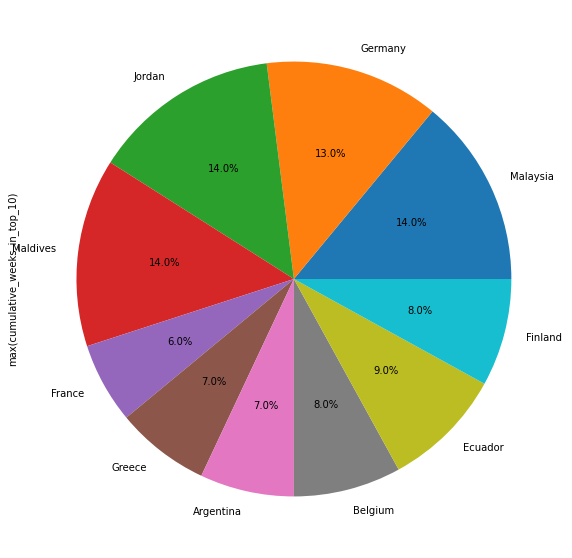

In [13]:
plt.figure(figsize=(18,5))
pdf.plot(kind='pie', y='max(cumulative_weeks_in_top_10)', 
         labels=pdf['country_name'], autopct='%1.1f%%',figsize=(10,10),legend=False)

# Show the pie chart
plt.show()

In [14]:
### Group the data by 'country_name' and 'show_title' and find the highest
### weekly rank and total weeks spent in the top 10 for each film, display the
### data
# .groupBy, .agg, F.max, F.min, .sort, .show



In [15]:
highest_rating_df = films_df.groupBy("country_name", "show_title").agg(F.min("weekly_rank"),F.sum("cumulative_weeks_in_top_10"))
# Display the resulting DataFrame
highest_rating_df.show(5)

+------------+-----------------+----------------+-------------------------------+
|country_name|       show_title|min(weekly_rank)|sum(cumulative_weeks_in_top_10)|
+------------+-----------------+----------------+-------------------------------+
|   Australia|        Bloodshot|               1|                              3|
|   Australia|          Traffik|               9|                              1|
|   Australia|Godzilla vs. Kong|               2|                              3|
|     Bahamas|       The Healer|               6|                              1|
|     Bahamas|  The Hurt Locker|               8|                              1|
+------------+-----------------+----------------+-------------------------------+
only showing top 5 rows



Produce a DataFrame which shows, for each country, the most popular film by the number of weeks it spent in the top 10, how many weeks that film was in the top 10, and the highest weekly rank it reached.

In [16]:
# group by country and show title, and aggregate the max weeks and min weekly rank
top_films_by_country = (
    films_df.groupBy(['country_name', 'show_title'])
      .agg(F.max('cumulative_weeks_in_top_10').alias('weeks_in_top_10'), 
           F.min('weekly_rank').alias('highest_rank'))
)

# sort by country and weeks in descending order
top_films_by_country = (
    top_films_by_country.sort(['country_name', 'weeks_in_top_10'], ascending=[True, False])
)

# display the resulting table
top_films_by_country.show()

+------------+--------------------+---------------+------------+
|country_name|          show_title|weeks_in_top_10|highest_rank|
+------------+--------------------+---------------+------------+
|   Argentina|  Sonic the Hedgehog|              7|           1|
|   Argentina|Hotel Transylvani...|              6|           2|
|   Argentina|                Vivo|              5|           3|
|   Argentina| The Tinder Swindler|              5|           1|
|   Argentina|       Don't Look Up|              5|           1|
|   Argentina|       The Sea Beast|              5|           1|
|   Argentina| Back to the Outback|              5|           3|
|   Argentina|The Secret Life o...|              5|           1|
|   Argentina|            All Hail|              5|           1|
|   Argentina|    The Unforgivable|              5|           1|
|   Argentina|    The Adam Project|              4|           1|
|   Argentina|      Chernobyl 1986|              4|           1|
|   Argentina|Fear Street

In [17]:
### Find the film that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show



In [18]:

# group by country name and show title, and calculate number of weeks and highest weekly rank
df_agg = df.groupBy('country_name', 'show_title').agg(
    F.sum('cumulative_weeks_in_top_10').alias('weeks_in_top_10'),
    F.min('weekly_rank').alias('highest_rank')
)

# sort by number of weeks spent in top 10 in descending order
df_sorted = df_agg.sort(F.desc('weeks_in_top_10'))

# select only the rows with the highest number of weeks spent in top 10 for each country
df_result = df_sorted.groupBy('country_name').agg(
    F.first('show_title').alias('most_popular_film'),
    F.max('weeks_in_top_10').alias('weeks_in_top_10'),
    F.first('highest_rank').alias('highest_rank')
)

# display the result
df_result.show()


+------------------+--------------------+---------------+------------+
|      country_name|   most_popular_film|weeks_in_top_10|highest_rank|
+------------------+--------------------+---------------+------------+
|         Argentina| Pasión de Gavilanes|           1726|           1|
|         Australia|     Stranger Things|            236|           1|
|           Austria|     Stranger Things|            226|           1|
|           Bahamas|SpongeBob SquareP...|            571|           3|
|           Bahrain|     Stranger Things|            187|           1|
|        Bangladesh|     Stranger Things|            267|           1|
|           Belgium|     Stranger Things|            236|           1|
|           Bolivia| Pasión de Gavilanes|           1668|           1|
|            Brazil|         Chiquititas|           1326|           2|
|          Bulgaria|     Stranger Things|            290|           1|
|            Canada|     Stranger Things|            200|           1|
|     

Group the DataFrame by `season_title` and count the number of countries where each season is the most popular. Convert the DataFrame to Pandas, and use the `DataFrame.plot.pie` method to produce a pie chart of the most popular shows.

In [20]:
most_popular_season = (df.groupBy("season_title")
                      .agg(F.countDistinct("country_name").alias("num_countries"), 
                           F.max("weekly_rank").alias("highest_rank"))
                      .orderBy(F.col("num_countries").desc())
                     )
most_popular_season.show()


+--------------------+-------------+------------+
|        season_title|num_countries|highest_rank|
+--------------------+-------------+------------+
|       You: Season 3|           94|          10|
|Squid Game: Season 1|           94|          10|
|Sex Education: Se...|           94|          10|
|All of Us Are Dea...|           94|          10|
|                null|           94|          10|
|The Witcher: Seas...|           94|          10|
|Inventing Anna: L...|           94|          10|
|Emily in Paris: S...|           94|          10|
|Resident Evil: Se...|           93|          10|
| Money Heist: Part 5|           93|          10|
|The Sandman: Seas...|           93|          10|
|   Stranger Things 4|           93|          10|
|  Sex/Life: Season 1|           93|          10|
| Hellbound: Season 1|           93|          10|
|Maid: Limited Series|           93|          10|
|Bridgerton: Season 2|           93|          10|
|The Umbrella Acad...|           91|          10|


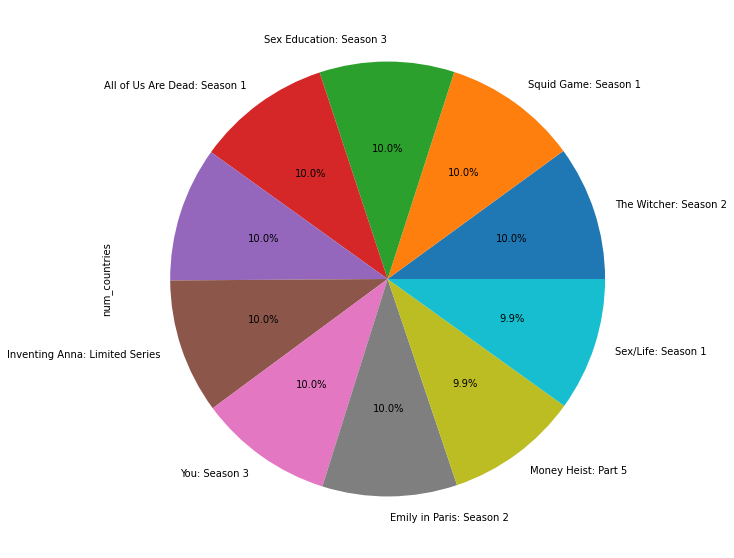

In [21]:
### Convert the DataFrame to a Pandas DataFrame, and display it as a pie chart
# .toPandas, .plot.pie
pdf = most_popular_season.toPandas()[0:10]
pdf.plot(kind='pie', y='num_countries', 
         labels=pdf['season_title'], autopct='%1.1f%%',figsize=(10,10),legend=False)

# Show the pie chart
plt.show()

# Exercise 3 - Most popular shows by country (10 Marks)


1.   Calculate the number of weeks each TV show spent in each country's top 10, across all seasons, such that you don't double count a show when two or more seasons appear in one week. (5 marks)
2.   Produce a DataFrame that contains the show which spent the most time in each country's top 10. (5 marks)

In [22]:
grouped_data = tv_df.groupBy('country_name', 'show_title') \
    .agg(F.count('week').alias('weeks_in_top_10'),
         F.max('weekly_rank').alias('highest_rank')) \
    .orderBy('country_name', 'show_title')

grouped_data.show()


+------------+--------------------+---------------+------------+
|country_name|          show_title|weeks_in_top_10|highest_rank|
+------------+--------------------+---------------+------------+
|   Argentina| 42 Days of Darkness|              2|          10|
|   Argentina|AlRawabi School f...|              2|          10|
|   Argentina|                Alba|              5|           7|
|   Argentina| Alice in Borderland|              1|           8|
|   Argentina|  All of Us Are Dead|              6|           9|
|   Argentina|        Almost Happy|              2|           7|
|   Argentina|Anatomy of a Scandal|              3|           6|
|   Argentina|        Another Self|              4|          10|
|   Argentina|              Arcane|              3|           7|
|   Argentina|          Archive 81|              1|           4|
|   Argentina|            Atypical|              3|          10|
|   Argentina|           Blindspot|              1|          10|
|   Argentina|Boruto: Nar

In [23]:
# group the DataFrame by country and show_title, and aggregate the maximum cumulative weeks
# and highest weekly ranking for each show in each country
grouped = df.groupBy('country_name', 'show_title') \
    .agg(F.max('cumulative_weeks_in_top_10').alias('max_weeks'),
         F.min('weekly_rank').alias('max_rank'))

# sort the DataFrame by country and the number of cumulative weeks in descending order,
# and drop duplicates to keep only the shows with the maximum number of weeks for each country
max_weeks_df = grouped.orderBy(['country_name', 'max_weeks'], ascending=[True, False]) \
    .dropDuplicates(['country_name', 'max_weeks']) \
    .select('country_name', 'show_title', 'max_weeks', 'max_rank')

# show the resulting DataFrame
max_weeks_df.show()


+------------+--------------------+---------+--------+
|country_name|          show_title|max_weeks|max_rank|
+------------+--------------------+---------+--------+
|   Argentina|The Transporter R...|        1|       8|
|   Argentina|       In Good Hands|        2|       1|
|   Argentina|       He's All That|        3|       2|
|   Argentina|      Emily in Paris|        4|       3|
|   Argentina|            Intimacy|        5|       2|
|   Argentina|      Inventing Anna|        6|       2|
|   Argentina|                 You|        7|       1|
|   Argentina|The Snitch Cartel...|        9|       1|
|   Argentina|Newly Rich, Newly...|       10|       1|
|   Argentina|          Squid Game|       11|       1|
|   Argentina|         Rebelde Way|       12|       7|
|   Argentina|   The Queen of Flow|       25|       1|
|   Argentina|Café con aroma de...|       30|       1|
|   Argentina|Yo soy Betty, la fea|       31|       6|
|   Argentina| Pasión de Gavilanes|       58|       1|
|   Austra

In [24]:
### Group the data by 'country_name' and 'show_title' and count the number of
### weeks each show appears in each country's top 10 lists, as well as the
### highest weekly ranking. Display the data.
# .groupBy, .agg, F.count_distinct, F.min, .sort, .show



In [25]:
grouped_df = df.groupBy('country_name', 'show_title') \
              .agg(F.countDistinct('week').alias('weeks_in_top_10'),
                   F.min('weekly_rank').alias('highest_rank')) \
              .sort('country_name', 'show_title')

grouped_df.show()


+------------+--------------------+---------------+------------+
|country_name|          show_title|weeks_in_top_10|highest_rank|
+------------+--------------------+---------------+------------+
|   Argentina|13 Hours: The Sec...|              2|           4|
|   Argentina|                1917|              2|           3|
|   Argentina|                 211|              1|           4|
|   Argentina|  365 Days: This Day|              2|           1|
|   Argentina|      40 Years Young|              1|           8|
|   Argentina| 42 Days of Darkness|              2|           8|
|   Argentina|47 Meters Down: U...|              2|           5|
|   Argentina|         7 Prisoners|              2|           5|
|   Argentina|A Boy Called Chri...|              2|           6|
|   Argentina|A California Chri...|              1|           4|
|   Argentina|A Castle For Chri...|              2|           7|
|   Argentina|A Classic Horror ...|              1|          10|
|   Argentina|     A Dog'

In [26]:
### Find the show that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show



In [28]:
result = (
    df.groupBy('country_name', 'show_title')
        .agg(F.sum('cumulative_weeks_in_top_10').alias('total_weeks_in_top_10'),
             F.max('weekly_rank').alias('highest_weekly_rank'))
        .orderBy(F.col('total_weeks_in_top_10').desc())
        .groupBy('country_name')
        .agg(F.first('show_title').alias('most_popular_show'),
             F.max('total_weeks_in_top_10').alias('weeks_in_top_10'),
             F.first('highest_weekly_rank').alias('highest_weekly_rank'))
        .orderBy('country_name')
)

result.show()

+------------------+--------------------+---------------+-------------------+
|      country_name|   most_popular_show|weeks_in_top_10|highest_weekly_rank|
+------------------+--------------------+---------------+-------------------+
|         Argentina| Pasión de Gavilanes|           1726|                 10|
|         Australia|     Stranger Things|            236|                 10|
|           Austria|     Stranger Things|            226|                 10|
|           Bahamas|SpongeBob SquareP...|            571|                 10|
|           Bahrain|     Stranger Things|            187|                  9|
|        Bangladesh|     Stranger Things|            267|                 10|
|           Belgium|     Stranger Things|            236|                  9|
|           Bolivia| Pasión de Gavilanes|           1668|                 10|
|            Brazil|         Chiquititas|           1326|                 10|
|          Bulgaria|     Stranger Things|            290|       